## Imports

In [83]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt

from category_encoders import TargetEncoder

# Scikit learn packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler # Scale between 0 and 1
from sklearn.preprocessing import StandardScaler # 

# For time differences
import time
from datetime import datetime


#import metrics functions
from sklearn import metrics
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

# Hypermeter tuning packages
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

## Load Data

***Load sentence vectors***

In [4]:
# Review text - Sentence to Vectors - Bert Embedding
df_text_bert =pd.read_csv('df_text_bert.csv', index_col=0)
# Review text - Words to Vectors - Glove Embedding
df_text_glove =pd.read_csv('df_text_glove.csv', index_col=0)
# App description
df_desc_bert =pd.read_csv('df_desc_bert.csv', index_col=0)

In [5]:
print('Shape:', df_text_bert.shape)
df_text_bert.head()

Shape: (16000, 768)


,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,-0.035029,-0.006903,1.337657,0.174699,0.093555,-1.726317,-0.373252,0.171986,0.359217,-0.287797,...,-0.267687,-0.705633,-0.950520,-0.803018,-0.351577,-0.408948,-0.148333,0.348156,-0.183150,0.393285
1,-0.357072,-0.226746,0.961590,0.251037,-0.743991,-1.129992,-0.431224,-0.146512,0.944198,-0.159195,...,-0.778291,-0.771172,-0.093147,-2.219298,-0.354459,-0.869687,0.058129,0.229607,-0.149266,0.377311
2,-0.234745,0.114082,1.664341,0.732730,0.186684,-1.380211,-0.278143,-0.261810,1.287586,-0.308171,...,-0.402438,-1.427730,-0.010735,-1.611847,-0.650448,-0.239737,-0.233384,0.065031,-0.211206,-0.078605
3,-0.094500,0.761218,0.592445,0.442082,-0.608362,-0.738993,0.741615,0.358003,-0.010582,0.094172,...,-0.140897,-0.182956,-0.399212,-2.179318,-0.034678,-0.309055,-0.056216,0.260642,0.137184,0.295071
4,-0.203245,-0.219366,1.343241,0.382345,-0.661124,-1.196098,-0.424366,-0.646019,0.972297,-0.310478,...,-0.482683,-0.510881,-0.224320,-2.557781,-0.671659,-0.484763,-0.510251,-0.280929,-0.535569,0.638781


In [6]:
print('Shape:', df_text_glove.shape)
df_text_glove.head()

Shape: (16000, 25)


,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,-0.095481,0.465363,0.020231,-0.357653,0.204755,0.008619,0.984975,-0.454963,0.114148,-0.205000,...,0.005369,0.104194,-0.343836,-0.039284,-0.154966,-0.524109,-0.473623,0.059042,0.365918,-0.363540
1,0.083955,0.114951,0.310043,-0.517333,-0.040672,0.431149,1.541831,-0.278181,-0.306568,-0.450887,...,0.434653,0.257523,-0.467399,-0.065934,-0.122967,-0.242351,0.264582,-0.264704,0.078452,-0.186285
2,0.197539,0.450679,0.174684,-0.621057,-0.108525,0.105656,1.290158,-0.017287,-0.021323,-0.237234,...,0.097987,0.208567,-0.791368,-0.157282,0.083074,-0.358440,-0.037480,0.132211,0.069473,-0.160459
3,-0.012691,0.395010,0.266414,-0.345809,-0.133150,0.147163,1.144651,-0.603839,-0.394740,-0.137749,...,0.363722,0.414809,-0.407349,0.013449,-0.358427,-0.044724,0.206266,0.254634,0.114628,-0.025033
4,0.056657,0.199712,0.100817,-0.457898,0.065930,0.451828,1.336158,-0.204669,0.089158,-0.236635,...,0.537089,0.290729,-0.650828,-0.249178,-0.128173,-0.434663,0.143912,0.138359,0.181426,-0.047157


In [7]:
print('Shape:', df_desc_bert.shape)
df_desc_bert.head()

Shape: (16000, 768)


,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,-0.414649,0.646612,0.525119,0.299547,0.355141,-1.096444,0.668979,-0.405251,0.272689,0.280042,...,-0.514183,-0.569816,-1.133771,-1.215530,-0.102096,-0.741071,0.615052,-0.231066,-0.363090,0.434954
1,-0.585347,0.611014,0.083937,-0.010009,0.084229,-1.203657,-0.675911,-0.364808,0.357000,-0.475526,...,-0.980201,-0.739966,-1.277325,-1.128996,0.210917,-0.700117,-0.013002,0.359813,0.194929,0.118562
2,-0.491153,0.321148,1.055571,0.525944,-0.128246,-1.179997,0.455277,-0.378289,0.745330,-0.116994,...,-0.414543,-0.473002,-1.092927,-1.670246,-0.129302,-0.941038,-0.139715,-0.394252,-0.333249,0.279534
3,-0.706174,0.713799,-0.287841,0.187931,0.025173,-1.383425,0.186983,0.241153,0.237699,-0.189615,...,-0.686614,-0.683201,-1.373564,-0.920556,-0.034600,-0.608570,0.054306,-0.210162,0.198317,0.389658
4,-0.706174,0.713799,-0.287841,0.187931,0.025173,-1.383425,0.186983,0.241153,0.237699,-0.189615,...,-0.686614,-0.683201,-1.373564,-0.920556,-0.034600,-0.608570,0.054306,-0.210162,0.198317,0.389658


***Load data related to reviews***

In [8]:
df = pd.read_csv('df_models.csv', index_col=0)

In [9]:
print('Shape:', df.shape)
df.head(1)

Shape: (16000, 142)


,review_id,title,body,rating,date,voteCount,voteSum,review_date_ymd,review_year,review_month,...,orig_description,text_clean,description_clean,remove_rate,text_trans,desc_trans,text_trans_token,desc_trans_token,similarity,user_account_usage_days
0,465664332,Simplicity is key..,"Finally an app that goes back to the basics, a...",5,2011-09-26 00:11:00-05:00,0,0,2011-09-26,2011,9,...,"""""""In pretty much every treasure hunting adven...",simplicity is key finally an app that goes bac...,in pretty much every treasure hunting adventur...,1.6,simplicity key finally app goes back basics go...,pretty much every treasure hunting adventure m...,"['simplic', 'key', 'final', 'app', 'goe', 'bac...","['pretti', 'much', 'everi', 'treasur', 'hunt',...",0.101088,0


***Select columns that will be used in ML models***

**Note:** This [document](https://docs.google.com/document/d/17Xe9_NeUw4Xr1bXgHiDy1-zQT4eQ-BwDaPqQkAKby-4/edit?usp=sharing) shows the last version of features in dataframe. 

In [10]:
print(f'Total number of features: {len(df.columns)}')
# Let's see the column names
df.columns[100:]

Total number of features: 142


Index(['Social Networking', 'Art', 'Word', 'Adventure', 'Dice',
       'Arts & Photography', 'Photo & Video', 'Music', 'user_label',
       'ave_length', 'ave_rating', 'ave_price', '1_review', 'app_label',
       'text', 'num_hashtags_text', 'num_hashtags_desc', 'num_ment_text',
       'num_ment_desc', 'num_word_text', 'num_word_desc', 'num_s_word_text',
       'num_s_word_desc', 'num_url_text', 'num_url_desc', 'ave_word_text',
       'ave_word_desc', 'num_punc_text', 'num_punc_desc', 'lang_text',
       'english', 'lang_desc', 'orig_description', 'text_clean',
       'description_clean', 'remove_rate', 'text_trans', 'desc_trans',
       'text_trans_token', 'desc_trans_token', 'similarity',
       'user_account_usage_days'],
      dtype='object')

**Note:** Classification algorithms excepts float or integer inputs. Therefore other types of features will be dropped or encoded. 

In [11]:
# Irrelevant features
irr_columns = ['review_id', 'date', 
               'review_date_ymd', 'review_month', 'review_quarter',
               'appId', 'username_y', 'appName','sellerName', 
               'initialReleaseData', 'currentReleaseDate',
               'initialReleaseData_2', 'currentReleaseDate_2',
               'diff_init_curr', 
               # Labels generated from review label
               'user_label', 'app_label',
               # textual data
               'title', 'body',  'description',
               'text', 'orig_description', 'text_clean',
               'description_clean',
               'text_trans', 'desc_trans',
               'text_trans_token', 'desc_trans_token']
print(f'There are {len(irr_columns)} columns will not be used in ML models.')

There are 27 columns will not be used in ML models.


In [12]:
# Drop these irrelevant columns and create a new df
df_models = df.drop(columns = irr_columns)
# My new df to use in building models: DF_MODELS
df_models.shape

(16000, 115)

## Train-Test Split

There are four dataframes that will be used in models.
* df_text_bert : Review text vectors (Sentence to vectors with Bert)
* df_text_glove : Review text vectors (Words to vectors with Glove)
* df_desc_bert : App description vectors   
(Sentence to vectors with Bert) 
* df_models    : Features related to reviews

I will split these dfs with using same seed.

***Data***

In [13]:
# Define X as model input data and y as review labels.

y = df_models['label'] # Target

# df_models
X = df_models # Keep review label for target encoding. Drop after. 
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20,random_state=53)
print(X_train.head().index)

# df_text_bert -- reviews -- 
X = df_text_bert
Xr_train, Xr_test, y_train, y_test = train_test_split(X, y,test_size=0.20,random_state=53)
print(Xr_train.head().index)

# df_text_bert -- reviews -- 
X = df_text_glove
Xg_train, Xg_test, y_train, y_test = train_test_split(X, y,test_size=0.20,random_state=53)
print(Xg_train.head().index)

# df_desc_bert --descriptions -- 
X = df_desc_bert 
Xd_train, Xd_test, y_train, y_test = train_test_split(X, y,test_size=0.20,random_state=53)
print(Xd_train.head().index)

# To see all splits are in same index look at X_train.head()

Int64Index([9326, 14631, 11303, 3392, 11042], dtype='int64')
Int64Index([9326, 14631, 11303, 3392, 11042], dtype='int64')
Int64Index([9326, 14631, 11303, 3392, 11042], dtype='int64')
Int64Index([9326, 14631, 11303, 3392, 11042], dtype='int64')


In [14]:
# Check the shapes
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

X_train: (12800, 115)
X_test: (3200, 115)
y_train: (12800,)
y_test: (3200,)


## Encoding

There are some categorical variables which are needed to be encoded. Get_dummies and target encoding will be used.

***Get dummies for categorical data***

In [15]:
# Rating feature is a discrete variable. 

# Get dummies for 'rating column' - TRAIN 
rating_dummies = pd.get_dummies(X_train['rating'], prefix='rating')
X_train = pd.concat([X_train, rating_dummies], axis=1)

# Get dummies for 'rating column' - TEST
rating_dummies = pd.get_dummies(X_test['rating'], prefix='rating')
X_test = pd.concat([X_test, rating_dummies], axis=1)

# Drop orijinal rating column
X_train.drop(columns='rating', inplace=True)
X_test.drop(columns='rating', inplace=True)

In [16]:
# Check
X_train.shape
# 5 added and 1 dropped

(12800, 119)

***Target encoding for discrete features***

**Note:** The following columns are categorical. They are needed to encode.

* review_year
* version_major
* primaryGenre
* lang_text
* lang_desc
* trackContentRating
* minimumOsVersion

In [17]:
# Define target encoder
encoder = TargetEncoder()

In [18]:
columns_need_encoding = ['trackContentRating', 'minimumOsVersion','review_year'
                      , 'version_major','lang_text','lang_desc', 'primaryGenre']
# create a loop for taget encoding
for col in columns_need_encoding:
    X_train[col] = X_train[col].astype('category') # convert to category
    X_train[col] = encoder.fit_transform(X_train[col], X_train['label']) # encode
    X_test[col] = X_test[col].astype('category') # convert to category
    X_test[col] = encoder.fit_transform(X_test[col], X_test['label']) # encode

In [19]:
# Let's see 
X_train[columns_need_encoding].head()

,trackContentRating,minimumOsVersion,review_year,version_major,lang_text,lang_desc,primaryGenre
9326,0.536907,0.494949,0.700444,0.660744,0.529236,0.502019,0.557032
14631,0.400579,0.240793,0.002766,0.123967,0.529236,0.502019,0.545272
11303,0.536907,0.477576,0.742850,0.660744,0.529236,0.502019,0.393241
3392,0.536907,0.477576,0.742850,0.660744,0.529236,0.502019,0.338710
11042,0.536907,0.431429,0.742850,0.660744,0.529236,0.502019,0.497160


In [20]:
# Drop label column -target- from X_train and X_test
X_train.drop(columns='label', inplace = True)
X_test.drop(columns='label', inplace = True)

## Impute NaNs

As mentioned in the EDA notebook, some NaNs exist in application-related features. The maximum number of NANs in a feature is 149 which is less than 1% of all data. Not all classification algorithms accept NaN therefore I have to impute them. Impute with mean or most frequent will be used.

In [21]:
# Max number of NaNs in a feature
max(df.isna().sum())

149

**Note:** In raw data, besides the primary genre feature, there was a feature that shows all genres related to applications. In the data wrangling notebook, new columns were generated for all genres. There are 148 NaNs in these columns. These NaNs are imputed with 0 because there is no information about app genres.

In [22]:
# Keep the copy of X_train and X_test with NaNs. XGBoost algorithm accepts the nulls. 
X_train_with_nan = X_train.copy()
X_test_with_nan = X_test.copy()

In [23]:
X_train.iloc[:, 32:89] = X_train.iloc[:, 32:89].replace(np.nan, 0)
X_test.iloc[:, 32:89] = X_test.iloc[:, 32:89].replace(np.nan, 0)

In [24]:
# Check whether any NaNs
X_test.iloc[:, 32:89].isna().sum().sum()

0

***Impute by mean***

In [25]:
# Price
X_train['price'].fillna(X_train['price'].mean(), inplace=True)
X_test['price'].fillna(X_test['price'].mean(), inplace=True)
# Number of Language
X_train['number_lang'].fillna(round(X_train['number_lang'].mean(), 0), inplace=True)
X_test['number_lang'].fillna(round(X_test['number_lang'].mean(), 0), inplace=True)
# numberOfDevices 
X_train['numberOfDevices'].fillna(round(X_train['numberOfDevices'].mean(), 0), inplace=True)
X_test['numberOfDevices'].fillna(round(X_test['numberOfDevices'].mean(), 0), inplace=True)
# diff_init_curr_2
X_train['diff_init_curr_2'].fillna(round(X_train['diff_init_curr_2'].mean(), 0), inplace=True)
X_test['diff_init_curr_2'].fillna(round(X_test['diff_init_curr_2'].mean(), 0), inplace=True)
# ave_price of a user
X_train['ave_price'].fillna(X_train['ave_price'].mean(), inplace=True)
X_test['ave_price'].fillna(X_test['ave_price'].mean(), inplace=True)
# allRatingCount
X_train['allRatingCount'].fillna(round(X_train['allRatingCount'].mean(), 0), inplace=True)
X_test['allRatingCount'].fillna(round(X_test['allRatingCount'].mean(),0), inplace=True)
# currentRatingCount
X_train['currentRatingCount'].fillna(round(X_train['currentRatingCount'].mean(),0), inplace=True)
X_test['currentRatingCount'].fillna(round(X_test['currentRatingCount'].mean(),0), inplace=True)

***Impute with most frequent value***

In [26]:
# allRatingAverage
X_train['allRatingAverge'].fillna(int(X_train['allRatingAverge'].mode()), inplace=True)
X_test['allRatingAverge'].fillna(int(X_test['allRatingAverge'].mode()), inplace=True)
# curentRatingAverage
X_train['curentRatingAverage'].fillna(int(X_train['curentRatingAverage'].mode()), inplace=True)
X_test['curentRatingAverage'].fillna(int(X_test['curentRatingAverage'].mode()), inplace=True)
# vppDeviceBasedLicensingEnabled
X_train['vppDeviceBasedLicensingEnabled'].fillna(int(X_train['vppDeviceBasedLicensingEnabled'].mode()), inplace=True)
X_test['vppDeviceBasedLicensingEnabled'].fillna(int(X_test['vppDeviceBasedLicensingEnabled'].mode()), inplace=True)
# paid
X_train['paid'].fillna(int(X_train['paid'].mode()), inplace=True)
X_test['paid'].fillna(int(X_test['paid'].mode()), inplace=True)

In [27]:
print(X_train.isna().sum().sum())
print(X_test.isna().sum().sum())

0
0


## Classification Models 

As mentioned before, we have four different data.

*   Review text
  * Bert 
  * Glove
*   Description text
*   All features (reviews, users, apps)

We will build models with three different inputs: 
1.   **Merge three dataframes:** Review text (Bert) + Description text (Bert) + All features 
2.   **Review text - Bert** 
3.   **Review text - Glove** 

This is because we may not always have other features related to users, apps. We want to see the model results with just review text. In this part, we use various classification algorithms with default parameters. 

***Merge these three X_trains & X_tests to use in models***

**Trains**: X_train, Xr_train and Xd_train 

**Tests:** X_test, Xr_test and Xd_test

In [28]:
X_train = pd.concat([X_train, Xr_train, Xd_train], axis=1) # !!! Use Bert vectors
X_test = pd.concat([X_test, Xr_test, Xd_test], axis=1) # !!! Use Bert vectors

In [29]:
# Check the shapes of all features
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

X_train: (12800, 1654)
X_test: (3200, 1654)
y_train: (12800,)
y_test: (3200,)


In [30]:
# Check the shapes of review text 
print('X_train:', Xr_train.shape)
print('X_test:', Xr_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

X_train: (12800, 768)
X_test: (3200, 768)
y_train: (12800,)
y_test: (3200,)


**Note:** All model evaluation metrics will append the ***results*** dataframe. After finding top 3 best model, we tune the hypermeters.

In [31]:
#initialize a results DataFrame to hold measures for comparison between models
results = pd.DataFrame(columns=['Model', 'Input', 'AUC', 'Accuracy','F1','Precision','Recall','Training Time (s)', 'Prediction Time (s)'])

### Logistic Regression

In [32]:
#instantiate logistic regression
model_lr = LogisticRegression(random_state=42)
# Loop for two different inputs
for train, test, name in [[X_train, X_test, 'all_features'], [Xr_train, Xr_test, 'review_Bert'], [Xg_train, Xg_test, 'review_Glove']]:
  # Start time again in each loop
  start_time = time.time() 
  # Build a logistic regression model
  model_lr.fit(train, y_train)
  train_time = time.time()-start_time
  # Call predict
  y_pred = model_lr.predict(test)
  predict_time = time.time()-start_time

  # Append metrics to dataframe
  results.loc[len(results.index)] = ['Logistic Regression', name, 
                                    metrics.roc_auc_score(y_test, y_pred),
                                    accuracy_score(y_test,y_pred),
                                    f1_score(y_test,y_pred, average='macro'),
                                    precision_score(y_test,y_pred, average='macro'),
                                    recall_score(y_test,y_pred, average='macro'),
                                    np.round(train_time,2), np.round(predict_time,2)]  

### Naive Bayes

In [33]:
# instantiate
model_nb = GaussianNB()
# Loop for two different inputs
for train, test, name in [[X_train, X_test, 'all_features'], [Xr_train, Xr_test, 'review_Bert'],[Xg_train, Xg_test, 'review_Glove']]:
  # Start time again in each loop
  start_time = time.time()
  model_nb.fit(train, y_train)
  train_time = time.time()-start_time
  y_pred = model_nb.predict(test)
  predict_time = time.time()-start_time

  # Append to results dataframa
  results.loc[len(results.index)] = ['Naive Bayes',  name,
                                    metrics.roc_auc_score(y_test, y_pred),
                                    accuracy_score(y_test,y_pred),
                                    f1_score(y_test,y_pred, average='macro'),
                                    precision_score(y_test,y_pred, average='macro'),
                                    recall_score(y_test,y_pred, average='macro'),
                                    np.round(train_time,2), np.round(predict_time,2)]  

### Multinomial Naive Bayes

**Note:** Multinomial NB doesn't take negative values therefore we need to scale before sending data to the model.

In [34]:
model_mnb = MultinomialNB()
# Loop for two different inputs
for train, test, name in [[X_train, X_test, 'all_features'], [Xr_train, Xr_test, 'review_Bert'], [Xg_train, Xg_test, 'review_Glove']]:
  # Scale data
  scaler = MinMaxScaler()
  X_train_scaled = scaler.fit_transform(train)
  X_test_scaled = scaler.transform(test)

  # Start time again in each loop
  start_time = time.time()
  # Fit the model
  model_mnb.fit(X_train_scaled, y_train)
  train_time = time.time()-start_time
  # predict
  y_pred = model_mnb.predict(X_test_scaled)
  predict_time = time.time() - start_time

  # Append to results dataframa
  results.loc[len(results.index)] = ['Multinomial Naive Bayes', name,
                                    metrics.roc_auc_score(y_test, y_pred),
                                    accuracy_score(y_test,y_pred),
                                    f1_score(y_test,y_pred, average='macro'),
                                    precision_score(y_test,y_pred, average='macro'),
                                    recall_score(y_test,y_pred, average='macro'),
                                    np.round(train_time,2), np.round(predict_time,2)]  

### Random Forest

In [35]:
#instantiate a RandomForestClassifier
model_rf = RandomForestClassifier(random_state=1)
# Loop for two different inputs
for train, test, name in [[Xr_train, Xr_test, 'review_Bert'], [Xg_train, Xg_test, 'review_Glove'], [X_train, X_test, 'all_features']]:
  # Start time again in each loop
  start_time=time.time() 
  # Build the model
  model_rf.fit(train, y_train)
  train_time = time.time()-start_time
  # Predict
  y_pred = model_rf.predict(test)
  predict_time = time.time() - start_time

  # Append to results dataframa
  results.loc[len(results.index)] = ['Random Forest', name,
                                    metrics.roc_auc_score(y_test, y_pred),
                                    accuracy_score(y_test,y_pred),
                                    f1_score(y_test,y_pred, average='macro'),
                                    precision_score(y_test,y_pred, average='macro'),
                                    recall_score(y_test,y_pred, average='macro'),
                                    np.round(train_time,2), np.round(predict_time,2)] 

**Note:** Let's see the Gini importances of features.

In [36]:
features = {} # a dict to hold feature_name: feature_importance

for feature, importance in zip(X_train.columns, model_rf.feature_importances_):
    features[feature] = importance #add the name/value pair 

# Use a df for feature importances
importances = pd.DataFrame.from_dict(features, orient='index').rename(columns={0: 'Gini-importance'})
# Top 30 feature importance
df_imp = importances.sort_values(by = 'Gini-importance', ascending=False).head(30)

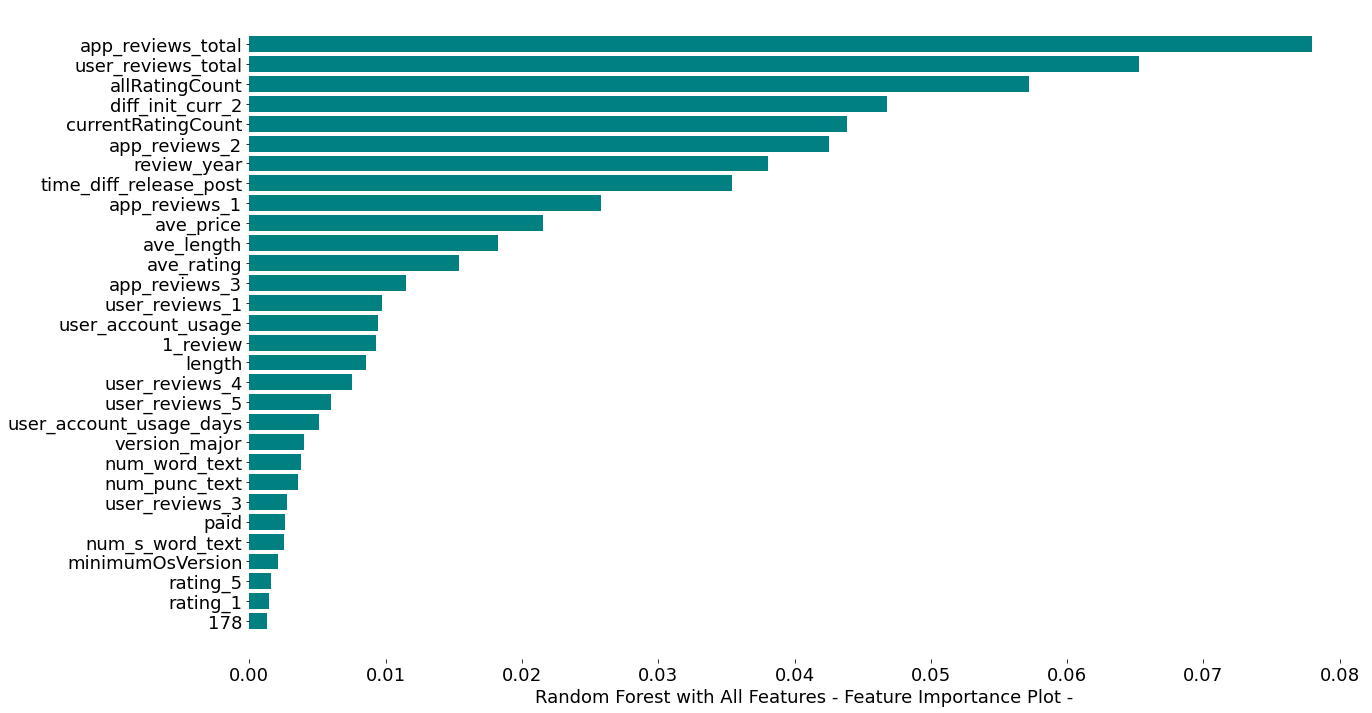

In [110]:
plt.figure(figsize=(20,12))
plt.barh(df_imp.iloc[::-1].index, df_imp.iloc[::-1]['Gini-importance'], color='teal') # Upside down wirh iloc[::-1]
plt.tick_params(labelsize=18)
plt.xlabel("Random Forest with All Features - Feature Importance Plot - ", fontsize=18)
plt.box(False)
plt.show()

### Gradient Boosting

In [38]:
model_gbc = GradientBoostingClassifier(random_state=42)
# Loop for two different inputs
for train, test, name in [[X_train, X_test, 'all_features'], [Xr_train, Xr_test, 'review_Bert'], [Xg_train, Xg_test, 'review_Glove']]:
  # Start time again in each loop
  start_time = time.time()
  # Fit the model
  model_gbc.fit(train, y_train)
  train_time = time.time()-start_time
  # Predict on test data
  y_pred = model_gbc.predict(test)
  predict_time = time.time() - start_time

  # Append to results dataframa
  results.loc[len(results.index)] = ['Gradient Boosting', name,
                                    metrics.roc_auc_score(y_test, y_pred),
                                    accuracy_score(y_test,y_pred),
                                    f1_score(y_test,y_pred, average='macro'),
                                    precision_score(y_test,y_pred, average='macro'),
                                    recall_score(y_test,y_pred, average='macro'),
                                    np.round(train_time,2), np.round(predict_time,2)] 


### Decision Tree

In [39]:
# Instantiate a tree.DecisionTreeClassifier. 
model_dt = DecisionTreeClassifier()
# Loop for two different inputs
for train, test, name in [[X_train, X_test, 'all_features'], [Xr_train, Xr_test, 'review_text'],[Xg_train, Xg_test, 'review_Glove']]:
  # Start time again in each loop
  start_time = time.time()
  # Call fit() on model
  model_dt.fit(train, y_train)
  train_time = time.time()-start_time
  # Call predict() on model with X_test passed to it, and assign the result to a variable y_pred 
  y_pred = model_dt.predict(test)
  predict_time = time.time()-start_time

  # Append to results dataframa
  results.loc[len(results.index)] = ['Decision Tree', name,
                                    metrics.roc_auc_score(y_test, y_pred),
                                    accuracy_score(y_test,y_pred),
                                    f1_score(y_test,y_pred, average='macro'),
                                    precision_score(y_test,y_pred, average='macro'),
                                    recall_score(y_test,y_pred, average='macro'),
                                    np.round(train_time,2), np.round(predict_time,2)] 

### AdaBoost Classifier

In [40]:
#instantiate an AdaBoostClassifier
ada = AdaBoostClassifier(random_state=22)
# Loop for two different inputs
for train, test, name in [[X_train, X_test, 'all_features'], [Xr_train, Xr_test, 'review_Bert'],[Xg_train, Xg_test, 'review_Glove']]:
  # Start time again in each loop
  start_time = time.time()
  # Call fit() on model
  model_ada = ada.fit(train, y_train)
  train_time = time.time()-start_time
  y_pred = model_ada.predict(test)
  predict_time = time.time() - start_time

  # Append to results dataframa
  results.loc[len(results.index)] = ['AdaBoost Classifier', name,
                                    metrics.roc_auc_score(y_test, y_pred),
                                    accuracy_score(y_test,y_pred),
                                    f1_score(y_test,y_pred, average='macro'),
                                    precision_score(y_test,y_pred, average='macro'),
                                    recall_score(y_test,y_pred, average='macro'),
                                    np.round(train_time,2), np.round(predict_time,2)] 

### **XGBoost classifier**


**Note:** There are some requirements for XGBoost to achieve top performance. Mainly:

* Numeric features should be scaled.
* Categorical features should be encoded.

Also, XGBoost supports missing values by default. In tree algorithms, branch directions for missing values are learned during training. Note that the gblinear booster treats missing values as zeros [[source]](https://xgboost.readthedocs.io/en/stable/faq.html). Therefore, we will use the all features data with NaNs.

In [41]:
X_train_2 = pd.concat([X_train_with_nan, Xr_train, Xd_train], axis=1)
X_test_2 = pd.concat([X_test_with_nan, Xr_test, Xd_test], axis=1)

In [42]:
model_xgb = xgb.XGBClassifier(seed=0)

# Loop for two different inputs
for train, test, name in [[X_train_2, X_test_2, 'all_features'], [Xr_train, Xr_test, 'review_Bert'],[Xg_train, Xg_test, 'review_Glove']]:
  # scale
  scaler = StandardScaler()
  train_scaled = scaler.fit_transform(train)
  test_scaled = scaler.transform(test)

  # Fit
  start_time = time.time()
  model_xgb.fit(train_scaled, y_train)
  train_time = time.time()-start_time
  # Predict
  y_pred = model_xgb.predict(test_scaled)
  predict_time = time.time() - start_time

  # Append to results dataframa
  results.loc[len(results.index)] = ['XGBoost classifier', name,
                                    metrics.roc_auc_score(y_test, y_pred),
                                    accuracy_score(y_test,y_pred),
                                    f1_score(y_test,y_pred, average='macro'),
                                    precision_score(y_test,y_pred, average='macro'),
                                    recall_score(y_test,y_pred, average='macro'),
                                    np.round(train_time,2), np.round(predict_time,2)] 

## Evaluation of All Models' Metrics

**Note:** Results dataframe shows all metrics of models with different inputs. Let's explore the df to see models' perfomance.

In [45]:
# Round all metrics
columns = ['AUC','Accuracy', 'F1', 'Precision','Recall']

for col in columns:
  results[col] = round(results[col], 3)

In [46]:
results.sort_values(by='AUC', ascending= False)

,Model,Input,AUC,Accuracy,F1,Precision,Recall,Training Time (s),Prediction Time (s)
21,XGBoost classifier,all_features,0.987,0.987,0.987,0.987,0.987,41.80,41.88
11,Random Forest,all_features,0.984,0.984,0.984,0.984,0.984,65.06,65.20
12,Gradient Boosting,all_features,0.980,0.980,0.980,0.980,0.980,638.67,638.88
18,Ada Boost Classifier,all_features,0.980,0.980,0.980,0.980,0.980,125.39,125.98
15,Decision Tree,all_features,0.967,0.968,0.967,0.968,0.967,96.63,96.68
6,Multinominal Naive Bayes,all_features,0.891,0.891,0.891,0.893,0.891,0.08,0.09
0,Logistic Regression,all_features,0.863,0.862,0.862,0.867,0.863,1.55,1.64
1,Logistic Regression,review_Bert,0.824,0.824,0.824,0.825,0.824,1.47,1.49
22,XGBoost classifier,review_Bert,0.813,0.812,0.812,0.813,0.813,33.29,33.32
13,Gradient Boosting,review_Bert,0.799,0.799,0.799,0.801,0.799,359.68,359.80


Overall, there are four models with all features which give more than 98% accuracy on the test data: 

* Random Forest, 
* Gradient Boosting, 
* Ada Boost Classifier,
* XGBoost Classifier. 

These metrics are great for detecting fake reviews. Unfortunately, models with just review text performed worse than models with all features. As expected, Bert sentence embeddings have worked better than Glove word embeddings.

Assuming we do not have any data about reviews, users, and apps, we have just reviews in the worst-case scenario. Therefore, working to optimize models with review text is necessary and valuable. For this reason, instead of optimizing models that already predict well, we tried to optimize models with review text -Bert-.

## **Hypermeter Tuning**

There are different methods for hypermeter tuning.
1.   **Grid Search** uses every combination of hyperparameter values is tried sometimes which can be very inefficient.
2.   **Random Search** selects random combinations from a grid of hyperparameter values. While it’s possible that RandomizedSearchCV will not find as accurate of a result as GridSearchCV, it surprisingly picks the best result more often than not and in a fraction of the time it takes GridSearchCV would have taken. 

### Logistic Regression

Logistic Regression requires two parameters that can be optimised by GridSearchCV:

*   'C' 
*   'penalty'

In [ ]:
model_lg_gs = LogisticRegression()

# define parameters
C = np.logspace(-4, 4, 50)
penalty = ['none', 'l1', 'l2', 'elasticnet']

parameters = [{'penalty':['none', 'l1', 'l2', 'elasticnet']}, 
              {'C':[1, 10, 100, 1000]}]

# Set up the k-fold cross-validation
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
                        
# define search
grid_search = GridSearchCV(estimator = model_lg_gs,
                           param_grid = parameters,
                           scoring = 'roc_auc',
                           cv = kfold,
                           n_jobs=-1,
                           verbose=0)

# start time and then execute search
start_time = datetime.now()
result = grid_search.fit(Xr_train, y_train)
search_time = datetime.now() - start_time

In [87]:
# View search time and best hyperparameters 
print('Search time:', search_time )
print('Best Penalty:', result.best_estimator_.get_params()['penalty'])
print('Best C:', result.best_estimator_.get_params()['C'])
print('Best Score: %s' % result.best_score_)

Search time: 0:00:19.726474
Best Penalty: l2
Best C: 1.0
Best Score: 0.9011989054248938


In [88]:
#update logistic regression model to reflect the tuned hyperparameters and fit to training data
#time the duration of training the model
start_time = time.time()
rf = LogisticRegression(penalty = 'l2', C=1).fit(Xr_train,y_train)
train_time = time.time()-start_time


#Evaluate model performance on test data
# Call predict() with Xr_test passed to it, and assign the result to a variable y_pred 
# time the prediction
start_time=time.time()
y_pred = rf.predict(Xr_test)
predict_time = time.time()-start_time

#print metrics
print("Random Forest model - test data statistics")
print("Train time:", round(train_time,3))
print("Prediction time:", round(predict_time))
print('Roc-Auc:', metrics.roc_auc_score(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test,y_pred))
print('F1 score', f1_score(y_test,y_pred, average='macro'))
print("Precision score:" , precision_score(y_test,y_pred, average='macro'))
print("Recall score:" , recall_score(y_test,y_pred, average='macro'))

Random Forest model - test data statistics
Train time: 1.302
Prediction time: 0
Roc-Auc: 0.8244916901575714
Accuracy: 0.824375
F1 score 0.8243595628522038
Precision score: 0.8246971741465603
Recall score: 0.8244916901575714


**Note:** Best parameters are default parameters so the metrics are same. 

### XGBoost Classifier

In [89]:
scaler = StandardScaler()
Xr_train_scaled = scaler.fit_transform(Xr_train)
Xr_test_scaled = scaler.transform(Xr_test)

In [90]:
# Define the search space
parameters = { 
    # Learning rate shrinks the weights to make the boosting process more conservative
    "learning_rate": [0.0001,0.001, 0.01, 0.1, 1] ,
    # Maximum depth of the tree, increasing it increases the model complexity.
    "max_depth": range(3,21,3),
    # Gamma specifies the minimum loss reduction required to make a split.
    "gamma": [i/10.0 for i in range(0,5)],
    # Percentage of columns to be randomly samples for each tree.
    "colsample_bytree": [i/10.0 for i in range(3,10)],
    # reg_alpha provides l1 regularization to the weight, higher values result in more conservative models
    "reg_alpha": [1e-5, 1e-2, 0.1, 1, 10, 100],
    # reg_lambda provides l2 regularization to the weight, higher values result in more conservative models
    "reg_lambda": [1e-5, 1e-2, 0.1, 1, 10, 100]}

# Set up the k-fold cross-validation
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

In [92]:
# Define random search
random_search = RandomizedSearchCV(estimator=model_xgb , 
                           param_distributions=parameters,
                           scoring = 'roc_auc', 
                           n_jobs=-1, 
                           cv=kfold, 
                           verbose=0)

# Fit grid search
start_time = datetime.now() # Start timer
random_result = random_search.fit(Xr_train_scaled, y_train)
search_time = datetime.now() - start_time

In [93]:
# Print grid search summary
random_result

RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=0, shuffle=True),
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           callbacks=None, colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=0, gpu_id=-1,
                                           grow_policy='depthwise',
                                           importance_type=None,
                                           interaction...
                                           num_parallel_tree=1,
                                           predictor='auto', random_state=0,
                                           reg_alpha=0, reg_lambda=1, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5, 0.6,
                                                             0.7, 0.8, 0.9],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.0001, 0.001, 0.01,
                                                          0.1, 1],
                                        'max_depth': range(3, 21, 3),
                                        'reg_alpha': [1e-05, 0.01, 0.1, 1, 10,
                                                      100],
                                        'reg_lambda': [1e-05, 0.01, 0.1, 1, 10,
                                                       100]},
                   scoring='roc_auc')

In [103]:
# Print the best score and the corresponding hyperparameters
print('Search time:', search_time)
print('Best Score: %s' % random_result.best_score_)
print(f'The best hyperparameters are {random_result.best_params_}')

Search time: 0:36:03.006711
Best Score: 0.8844957510039134
The best hyperparameters are {'reg_lambda': 10, 'reg_alpha': 1e-05, 'max_depth': 9, 'learning_rate': 0.1, 'gamma': 0.0, 'colsample_bytree': 0.8}


In [100]:
#update svm model to reflect the tuned hyperparameters and fit to training data
#time the duration of training the model
start_time = time.time()
random_best = random_search.best_estimator_.fit(Xr_train_scaled,y_train)
train_time = time.time()-start_time

#Evaluate model performance on test data

# Call predict() on cv_rf with X_test passed to it, and assign the result to a variable y_pred 
#time the prediction
start_time = time.time()
y_pred = random_best.predict(Xr_test_scaled)
predict_time = time.time()-start_time

print("XGBBoost - test data statistics")
print("Train time:", round(train_time,3))
print("Prediction time:", round(predict_time))
print('Roc-Auc:', metrics.roc_auc_score(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test,y_pred))
print('F1 score', f1_score(y_test,y_pred, average='macro'))
print("Precision score:" , precision_score(y_test,y_pred, average='macro'))
print("Recall score:" , recall_score(y_test,y_pred, average='macro'))

XGBBoost - test data statistics
Random Forest model - test data statistics
Train time: 38.29
Prediction time: 0
Roc-Auc: 0.8117933196242288
Accuracy: 0.8115625
F1 score 0.8114475824572378
Precision score: 0.8127875757479566
Recall score: 0.8117933196242288


### GradientBoosting

In [102]:
model_gb = GradientBoostingClassifier(random_state=42)

#create param grid over which to grid search
parameters = {
        'n_estimators': range(50,151,25),
        'learning_rate': np.arange(0.01,1.51,0.5),
        'max_depth': range(10,51,5),
        'min_samples_split': range(2, 103, 20),
        'min_samples_leaf': range(1,102, 20),
        'max_features': ['log2', 'sqrt',None]
         }

cv_gb = RandomizedSearchCV(model_gb, param_distributions=parameters,
                           scoring = 'roc_auc', 
                           n_jobs=-1, 
                           cv=kfold, 
                           verbose=0)

#time the search
start_time = datetime.now()
cv_gb.fit(Xr_train,y_train)
search_time = datetime.now() - start_time

In [104]:
# Print the best score and the corresponding hyperparameters
print('Search time:', search_time)
print('Best Score: %s' % cv_gb.best_score_)
print(f'The best hyperparameters are {cv_gb.best_params_}')

Search time: 0:36:03.006711
Best Score: 0.8798991183096726
The best hyperparameters are {'n_estimators': 100, 'min_samples_split': 42, 'min_samples_leaf': 61, 'max_features': None, 'max_depth': 10, 'learning_rate': 0.51}


In [105]:
#update  model to reflect the tuned hyperparameters and fit to training data
#time the duration of training the model
start_time = time.time()
random_best = cv_gb.best_estimator_.fit(Xr_train,y_train)
train_time = time.time()-start_time

#Evaluate model performance on test data

# Call predict() on cv_rf with X_test passed to it, and assign the result to a variable y_pred 
#time the prediction
start_time = time.time()
y_pred = cv_gb.predict(Xr_test)
predict_time = time.time()-start_time

print("Gradient Boosting - test data statistics")
print("Train time:", round(train_time,3))
print("Prediction time:", round(predict_time))
print('Roc-Auc:', metrics.roc_auc_score(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test,y_pred))
print('F1 score', f1_score(y_test,y_pred, average='macro'))
print("Precision score:" , precision_score(y_test,y_pred, average='macro'))
print("Recall score:" , recall_score(y_test,y_pred, average='macro'))

Gradient Boosting - test data statistics
Train time: 1093.816
Prediction time: 0
Roc-Auc: 0.8114315805264046
Accuracy: 0.81125
F1 score 0.8111879722987122
Precision score: 0.812011271574498
Recall score: 0.8114315805264046


## Random Forest

In [107]:
#instantiate a RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

#create param grid over which to grid search
parameters = {'n_estimators':range(50,201,50),
          'criterion':['gini','entropy'],
          'max_depth': range(20,51,5),
          'min_samples_split': range(2, 103, 20),
          'min_samples_leaf': range(2,103, 20),
          'max_features': ['log2', 'sqrt']
         }

#set up search
cv_rf = RandomizedSearchCV(rf, param_distributions=parameters, scoring = 'roc_auc', 
                           n_jobs=-1, 
                           cv=kfold, 
                           verbose=0)
#time the search
start_time = datetime.now()
cv_rf.fit(Xr_train,y_train)
search_time = datetime.now() - start_time


In [108]:
# Print the best score and the corresponding hyperparameters
print('Search time:', search_time)
print('Best Score: %s' % cv_rf.best_score_)
print(f'The best hyperparameters are {cv_rf.best_params_}')

Search time: 0:01:16.191406
Best Score: 0.8587352964006548
The best hyperparameters are {'n_estimators': 100, 'min_samples_split': 22, 'min_samples_leaf': 22, 'max_features': 'sqrt', 'max_depth': 40, 'criterion': 'gini'}


In [109]:
#Evaluate model performance on test data

# Call predict() on cv_rf with X_test passed to it, and assign the result to a variable y_pred 
#time the prediction
start_time = time.time()
y_pred = cv_rf.predict(Xr_test)
predict_time = time.time()-start_time

print("Gradient Boosting - test data statistics")
print("Train time:", round(train_time,3))
print("Prediction time:", round(predict_time))
print('Roc-Auc:', metrics.roc_auc_score(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test,y_pred))
print('F1 score', f1_score(y_test,y_pred, average='macro'))
print("Precision score:" , precision_score(y_test,y_pred, average='macro'))
print("Recall score:" , recall_score(y_test,y_pred, average='macro'))

Search time: 0:01:16.191406
Best Score: 0.8587352964006548
The best hyperparameters are {'n_estimators': 100, 'min_samples_split': 22, 'min_samples_leaf': 22, 'max_features': 'sqrt', 'max_depth': 40, 'criterion': 'gini'}
Gradient Boosting - test data statistics
Train time: 30.71
Prediction time: 0
Roc-Auc: 0.7847847691432643
Accuracy: 0.784375
F1 score 0.7838613329490869
Precision score: 0.7879433251598877
Recall score: 0.7847847691432643
